In [19]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from scipy import stats

from useful_functions import *

In [20]:
tables_to_join = ["tMorphology", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(167, 22)

In [21]:
full_df.head()

,sample_id,species,plant_ht,num_leaves,longest_leaf_cm,widest_leaf_cm,stem_diam_mm,num_inflores,num_flowers,herbivory,...,collect_date,sample_id,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,exaltata,90.0,13,None,None,6.0,4.0,None,none,...,6/25/2021,RRL1,0.753244,0.246756,exaltata,0.194769,0.048276,-0.023880,-0.017138,-0.039842
1,RRL2,exaltata,100.0,14,None,None,5.0,5.0,None,none,...,6/25/2021,RRL2,0.708412,0.291588,exaltata,0.154924,0.071277,0.000923,-0.025830,0.005592
2,RRL3,exaltata,76.0,14,None,None,5.0,3.0,None,none,...,6/25/2021,RRL3,0.778046,0.221954,exaltata,0.187750,0.035009,-0.016006,-0.012529,-0.011169
3,RRL4,exaltata,84.0,17,None,None,5.0,3.0,None,none,...,6/25/2021,RRL4,0.720367,0.279633,exaltata,0.167167,0.046053,-0.032754,-0.016192,-0.028988
4,RRL5,exaltata,130.0,18,None,None,7.0,2.0,None,none,...,6/25/2021,RRL5,0.572487,0.427513,exaltata,0.099801,0.089800,0.000613,-0.004979,0.017524


In [22]:
df = full_df
df = df.T.drop_duplicates().T
df.shape

(167, 19)

In [29]:
morph_char = df.columns
morph_char = morph_char.drop(['sample_id', 'species', 'longest_leaf_cm',
       'widest_leaf_cm', 'herbivory',
       'site_id', 'collect_date', 'V1', 'V2', 'species', 'PC1', 'PC2', 'PC3',
       'PC4', 'PC5'])

In [33]:
morph_char

Index(['plant_ht', 'num_leaves', 'stem_diam_mm', 'num_inflores'], dtype='object')

In [36]:
df = df.dropna()

## Boxplot of plant Morphology by V2

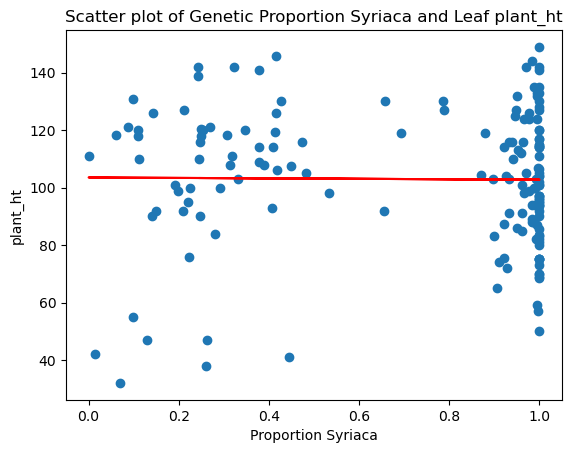

plant_ht
Correlation coefficient value: -0.011463696112669154
Correlation P-Value: 0.8831038147454956


ValueError: could not convert string to float: '[nothing listed]'

In [30]:
x_data = df['V2'].astype(float)

for i in morph_char:
    y_data = df[i].astype(float)
    
    corel_coef, p_value = stats.pearsonr(x_data, y_data)
    
    # Perform linear regression to calculate the best-fit line
    slope, intercept = np.polyfit(x_data, y_data, 1)

    # Create a scatter plot
    plt.scatter(x_data, y_data, label='Data Points')

    # Create the best-fit line using the slope and intercept
    best_fit_line = [slope * x + intercept for x in x_data]

    # Plot the best-fit line
    plt.plot(x_data, best_fit_line, color='red', label='Best Fit Line')

    # Add labels and a legend
    plt.xlabel('Proportion Syriaca')
    plt.ylabel(i)
    #plt.legend()

    # Show the plot
    plt.title(f'Scatter plot of Genetic Proportion Syriaca and Leaf {i}')
    
    if p_value < 0.05:
        plt.text(x_data.max()-.4, y_data.max(), f"Pearson's r ={round(corel_coef,2)}")
        plt.text(x_data.max()-.4, y_data.max()*.95, f"P-Value ={round(p_value, 5)}")
    
    plt.show()
    
    print(i)
    print(f'Correlation coefficient value: {corel_coef}')
    print(f'Correlation P-Value: {p_value}')